<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [8]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [34]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [10]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [11]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [14]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


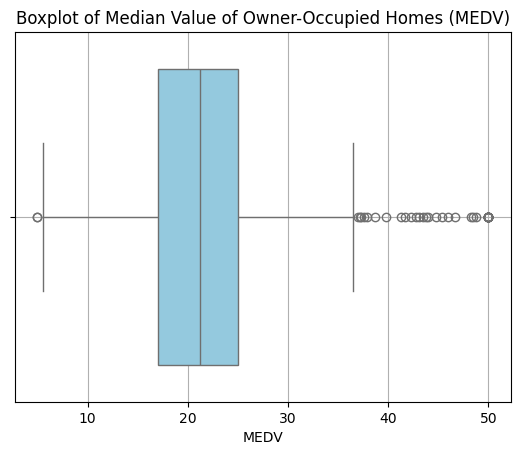

In [21]:
sns.boxplot(data=boston_df, x='MEDV', color='skyblue')
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.xlabel('MEDV')
pyplot.grid(True)
pyplot.show()

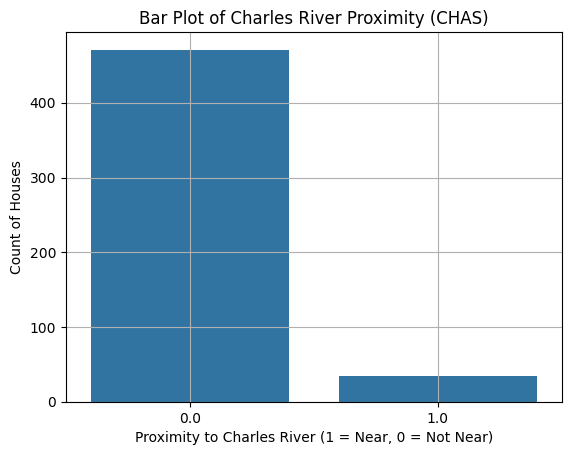

In [24]:
sns.countplot(data=boston_df, x='CHAS')
plt.title('Bar Plot of Charles River Proximity (CHAS)')
plt.xlabel('Proximity to Charles River (1 = Near, 0 = Not Near)')
plt.ylabel('Count of Houses')
plt.grid(True)
plt.show()

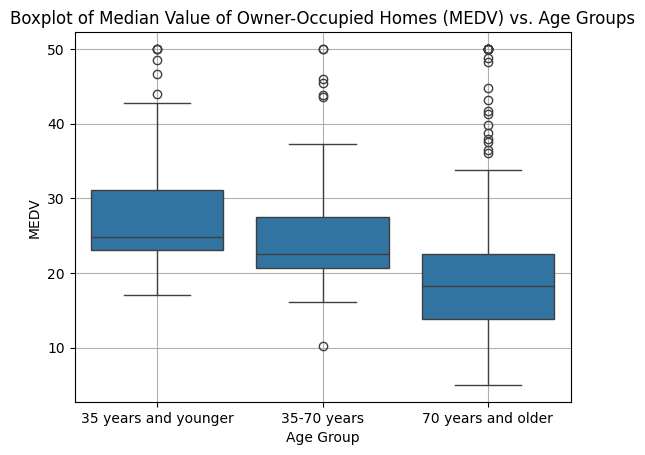

In [28]:
age_bins = [0, 35, 70, float('inf')]  # Define the age bins
age_labels = ['35 years and younger', '35-70 years', '70 years and older']  # Label the bins
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

sns.boxplot(data=boston_df, x='AGE_GROUP', y='MEDV')
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV) vs. Age Groups')
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.grid(True)
plt.show()

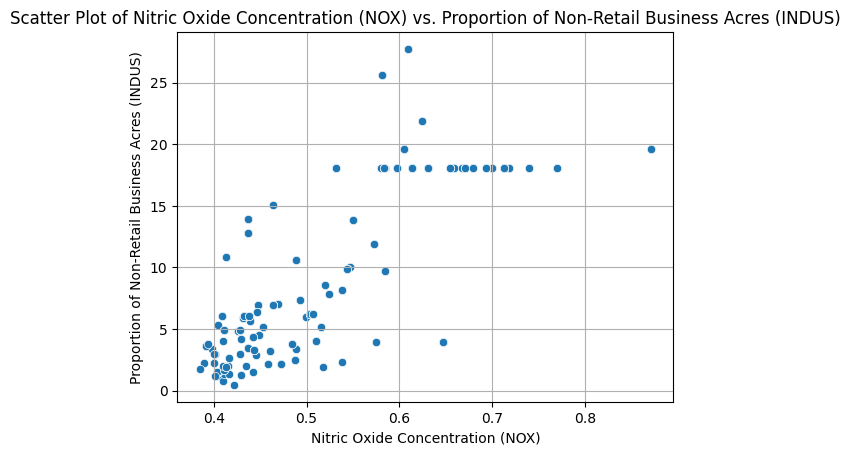

In [29]:
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')
plt.title('Scatter Plot of Nitric Oxide Concentration (NOX) vs. Proportion of Non-Retail Business Acres (INDUS)')
plt.xlabel('Nitric Oxide Concentration (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.grid(True)
plt.show()

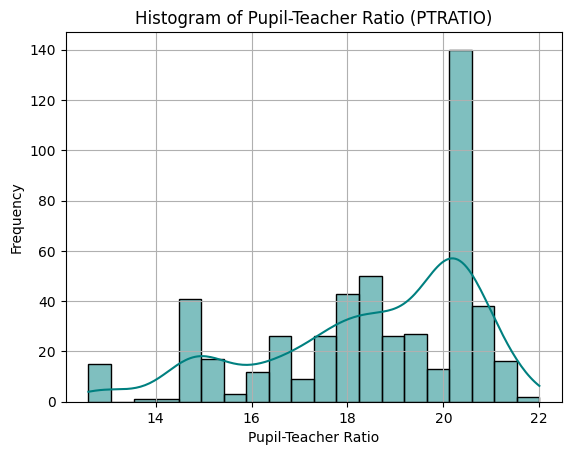

In [30]:
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True, color='teal')
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [35]:
near_river = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Houses bounded by the Charles River
not_near_river = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Houses not bounded by the Charles River

# Perform a t-test for independent samples
t_stat, p_value = stats.ttest_ind(near_river, not_near_river)

# Print the test results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Hypothesis Testing
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles River or not.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median value of houses bounded by the Charles River or not.")

T-statistic: 3.996
P-value: 0.000
Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles River or not.


In [42]:
age_bins = [0, 33, 66, 100]
age_labels = ['0-33%', '33%-66%', '66%-100%']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

# Check the discretization
print(boston_df[['AGE', 'AGE_GROUP']].head())

# Perform one-way ANOVA to compare MEDV (Median Value of Houses) across the different AGE groups
grouped_data = [boston_df[boston_df['AGE_GROUP'] == group]['MEDV'] for group in age_labels]
f_stat, p_value = stats.f_oneway(*grouped_data)

# Print the results
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.8f}")

# Hypothesis Testing
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the median value of houses for each proportion of owner-occupied units built prior to 1940.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median value of houses for each proportion of owner-occupied units built prior to 1940.")


    AGE AGE_GROUP
0  65.2   33%-66%
1  78.9  66%-100%
2  61.1   33%-66%
3  45.8   33%-66%
4  54.2   33%-66%
F-statistic: 32.287
P-value: 0.00000000
Reject the null hypothesis: There is a significant difference in the median value of houses for each proportion of owner-occupied units built prior to 1940.


In [45]:
corr_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print(f"Pearson Correlation Coefficient: {corr_coefficient:.3f}")
print(f"P-value: {p_value:.3f}")

# Hypothesis Testing
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("Fail to reject the null hypothesis: There is no significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")

Pearson Correlation Coefficient: 0.764
P-value: 0.000
Reject the null hypothesis: There is a significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


In [46]:
X = boston_df['DIS']  # Independent variable (weighted distance to employment centers)
y = boston_df['MEDV']  # Dependent variable (median value of owner-occupied homes)

# Add a constant to the independent variable for the intercept in the regression model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)  # Ordinary Least Squares regression
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# Hypothesis Testing
if results.pvalues[1] < 0.05:
    print("Reject the null hypothesis: The weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes.")
else:
    print("Fail to reject the null hypothesis: The weighted distance to the five Boston employment centers has no significant impact on the median value of owner-occupied homes.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        16:35:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<ipython-input-46-4b29d7ecee08>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if results.pvalues[1] < 0.05:


Reject the null hypothesis: The weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes.
